In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing Datasets

In [2]:
df = pd.read_csv('Bike_Trip.csv')

In [3]:
#Displaying First five data
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,326,2013-10-01 00:01:08,2013-10-01 00:06:34,239,Willoughby St & Fleet St,40.691966,-73.981302,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,16052,Subscriber,1982,1
1,729,2013-10-01 00:01:21,2013-10-01 00:13:30,322,Clinton St & Tillary St,40.696192,-73.991218,398,Atlantic Ave & Furman St,40.691652,-73.999979,19412,Customer,\N,0
2,520,2013-10-01 00:01:24,2013-10-01 00:10:04,174,E 25 St & 1 Ave,40.738177,-73.977387,403,E 2 St & 2 Ave,40.725029,-73.990697,19645,Subscriber,1984,1
3,281,2013-10-01 00:01:25,2013-10-01 00:06:06,430,York St & Jay St,40.701485,-73.986569,323,Lawrence St & Willoughby St,40.692362,-73.986317,16992,Subscriber,1985,1
4,196,2013-10-01 00:01:27,2013-10-01 00:04:43,403,E 2 St & 2 Ave,40.725029,-73.990697,401,Allen St & Rivington St,40.720196,-73.989978,15690,Subscriber,1986,1


In [4]:
df.shape

(1037712, 15)

In [5]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [6]:
#Basic information of the datasets
df.describe()


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,gender
count,1.037712e+06,1.037712e+06,1.037712e+06,1.037712e+06,1.037712e+06,1.037712e+06,1.037712e+06,1.037712e+06,1.037712e+06
mean,8.256148e+02,4.437142e+02,4.073452e+01,-7.399113e+01,4.432074e+02,4.073428e+01,-7.399127e+01,1.764407e+04,1.123756e+00
std,2.000373e+03,3.544343e+02,1.957341e-02,1.231612e-02,3.573982e+02,1.955785e-02,1.238558e-02,1.717681e+03,5.443806e-01
min,6.000000e+01,7.200000e+01,4.068034e+01,-7.401713e+01,7.200000e+01,4.068034e+01,-7.401713e+01,1.452900e+04,0.000000e+00
25%,3.940000e+02,3.030000e+02,4.072165e+01,-7.400017e+01,3.010000e+02,4.072087e+01,-7.400027e+01,1.616400e+04,1.000000e+00
50%,6.220000e+02,4.020000e+02,4.073620e+01,-7.399076e+01,4.020000e+02,4.073544e+01,-7.399099e+01,1.765800e+04,1.000000e+00
75%,1.005000e+03,4.860000e+02,4.075020e+01,-7.398205e+01,4.850000e+02,4.074972e+01,-7.398263e+01,1.911300e+04,1.000000e+00
max,1.259480e+06,3.002000e+03,4.077051e+01,-7.395005e+01,3.002000e+03,4.077051e+01,-7.395005e+01,2.075700e+04,2.000000e+00


In [7]:
# Basic Data Quality Check

In [8]:
df.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

- ✅ No missing values found in the dataset.
- ✅ Heatmap for missing data skipped as no null values present.

In [9]:
df.duplicated().sum()

0

- ✅ No duplicate rows detected.
- ✅ All data types are appropriate.

In [10]:
# Question 1 What is the Total Subscriber Percentage?

In [11]:
subscriber_num = df['usertype'].loc[df['usertype']=='Subscriber'].count()

In [12]:
total= len(df)
print('The total percentage of annual subscribers is', round(subscriber_num/total*100,3))

The total percentage of annual subscribers is 90.61


- ✅ This is the total Subscriber's Percentage

In [13]:
# Question 2 : How does trip length vary based on trip start time?


In [14]:
df['hour'] = df['starttime'].str[11:13]

In [15]:
print(df.columns)

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'hour'],
      dtype='object')


In [16]:
#Seperating user Subscriber and Customers

<Axes: xlabel='hour', ylabel='tripduration'>

c:\Users\anmol\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\anmol\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


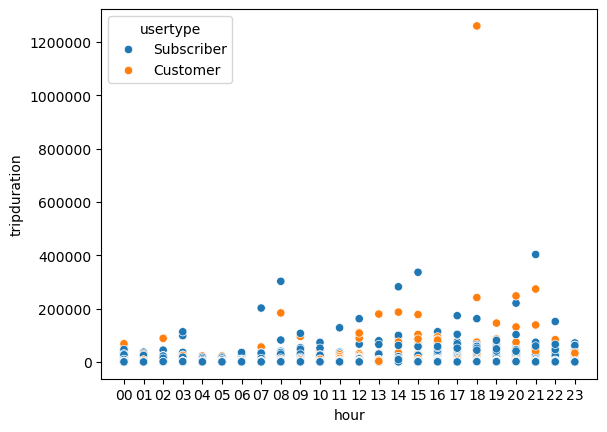

In [17]:
plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(x='hour', y='tripduration', data=df , hue='usertype')

- ✅ Bike usage usually peaks at 9 PM and 2 PM to 3 PM
- ✅ Subscribers outnumber Customers significantly — possibly daily office commuters.
- ✅ Mostly trips between 5-15 minutes.

In [18]:
# Question 3 Provide a Bar chart for Top Five stations to get Bike Trip?

In [19]:
df2 = df.groupby(['start station id']).size().reset_index(name='count')

In [20]:
#df with station id and count only
df2

,start station id,count
0,72,3325
1,79,2597
2,82,1236
3,83,2142
4,116,6376
...,...,...
325,2017,1713
326,2021,5469
327,2022,2421
328,2023,1700


In [21]:
temp_df = df.drop_duplicates('start station id')

In [22]:
merged_df = pd.merge(df2, temp_df[['start station id', 'start station name', 'end station name']], on='start station id', how='left')

In [23]:
top5_start_stations = merged_df.sort_values(by='count', ascending=False).head(5)

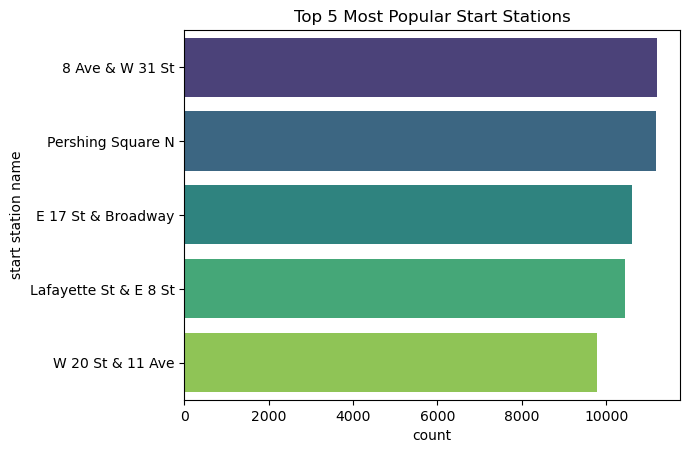

In [24]:
sns.barplot(x='count', y='start station name', data=top5_start_stations, hue= 'start station name', legend=False, palette='viridis')
plt.title('Top 5 Most Popular Start Stations')
plt.show()

- ✅ Provides Top 5 Locations from where user started their trip
- ✅ Start 8 Ave & W 31 St was the most frequently used.

In [25]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [26]:
import folium

In [27]:
# For GeoVisualization of Station Location

In [28]:
new_df = pd.merge(df2, temp_df[['start station id', 'start station name', 'start station latitude','end station longitude']], on='start station id', how='left')

In [29]:
new_df

,start station id,count,start station name,start station latitude,end station longitude
0,72,3325,W 52 St & 11 Ave,40.767272,-73.993934
1,79,2597,Franklin St & W Broadway,40.719116,-73.990765
2,82,1236,St James Pl & Pearl St,40.711174,-73.989978
3,83,2142,Atlantic Ave & Fort Greene Pl,40.683826,-73.982050
4,116,6376,W 17 St & 8 Ave,40.741776,-74.005628
...,...,...,...,...,...
325,2017,1713,E 43 St & 2 Ave,40.750224,-74.007756
326,2021,5469,W 45 St & 8 Ave,40.759291,-73.994618
327,2022,2421,E 59 St & Sutton Pl,40.758491,-73.978095
328,2023,1700,E 55 St & Lexington Ave,40.759681,-73.999318


In [30]:
m = folium.Map( location = [40.72740794 , -73.98142006] , tiles = 'OpenStreetMap', zoom_start = 13)

In [31]:
for i in range(len(new_df)):
    folium.Marker(
        location=[new_df.loc[i, 'start station latitude'],new_df.loc[i,'end station longitude']],
        popup= new_df.loc[i, 'start station name'],
    ) .add_to(m)

In [32]:
m

- ✅ Map containing Location of all the Bike Station names within NYC
- ✅ Stations are densely clustered in central city areas (Manhattan).

Final Markdown: 
- **Data Quality**:  
  The dataset is clean — no missing values or duplicate records.

- **Most Popular Start Station**:  
  The most frequently used starting station is **'8 Ave & W 31 St'**, suggesting it’s a major hub for riders.

- **Peak Hours of Usage**:  
  Most trips occur between **8 AM and 6 PM**, with clear peaks during morning and evening commute times.

- **Trip Duration**:  
  Majority of trips are short (under 30 minutes), typical of city commutes. Longer trips are rare.

- **User Type Distribution**:  
  **Subscribers** (regular users) make up most of the trips, compared to casual **Customers**.

- **Station Locations (Map)**:  
  Folium map shows start stations are densely clustered around central areas like **Midtown Manhattan**, indicating high demand zones.

---

### Notes:
- Heatmap skipped due to large data size.
- Outlier or seasonal analysis not included but can improve future analysis.
